In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [4]:
def calculate_rms(values):
    squares = values**2
    total = np.sum(squares)
    mean = total/len(squares)
    rms = np.sqrt(mean)
    return rms

In [5]:
def calculate_fwhm(X,Y):
    half_max = max(Y) / 2.
    d = np.sign(half_max - np.array(Y[0:-1])) - np.sign(half_max - np.array(Y[1:]))
    left_idx = np.where(d > 0)[0]
    right_idx = np.where(d < 0)[-1]
    return (X[right_idx] - X[left_idx])[0] #return the difference (full width)

In [6]:
def calculate_80percent_ee(mu, sigma):
    lower_bound = norm.ppf(0.1, mu, sigma)
    upper_bound = norm.ppf(0.9, mu, sigma)
    return [lower_bound, upper_bound]

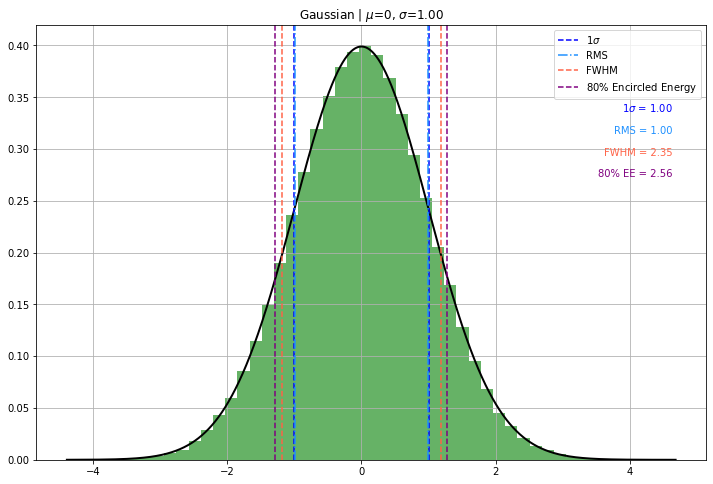

In [26]:
# Define parameters
mu = 0  # mean
sigma = 1  # standard deviation 
how_many = 100000

# Gaussian distribution
y = np.random.normal( mu, sigma, how_many)
plt.figure(figsize=(12, 8))
count, bins, ignored = plt.hist(y, bins=50, density=True, alpha=0.6, color='g')
x = np.linspace(min(bins), max(bins), how_many)
pdf = norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'k', linewidth=2)

# calculate stats
rms = calculate_rms(y)
fwhm = calculate_fwhm(x, pdf)
psf_80ee = calculate_80percent_ee(mu, sigma)
psf_diamter = psf_80ee[1] - psf_80ee[0]

# annotate
plt.axvline(mu + sigma, color='blue', linestyle='--', label='1$\sigma$')
plt.axvline(mu - sigma, color='blue', linestyle='--')

plt.axvline(mu + rms, color='dodgerblue', linestyle='-.', label='RMS')
plt.axvline(mu - rms, color='dodgerblue', linestyle='-.')

plt.axvline(mu + fwhm / 2, color='tomato', linestyle='--', label='FWHM')
plt.axvline(mu - fwhm / 2, color='tomato', linestyle='--')

plt.axvline(psf_80ee[0], color='purple', linestyle='--', label='80$\%$ Encircled Energy')
plt.axvline(psf_80ee[1], color='purple', linestyle='--')


plt.grid(True)
plt.title(f'Gaussian | $\mu$=0, $\sigma$={sigma:.2f}')
plt.legend()
ax = plt.gca()
ax.annotate(f'1$\sigma$ = {sigma:.2f}', xy=(0.95, 0.80), xycoords='axes fraction', color='blue', ha='right')
ax.annotate(f'RMS = {rms:.2f}', xy=(0.95, 0.75), xycoords='axes fraction', color='dodgerblue', ha='right')
ax.annotate(f'FWHM = {fwhm:.2f}', xy=(0.95, 0.70), xycoords='axes fraction', color='tomato', ha='right')
ax.annotate(f'80% EE = {psf_diamter:.2f}', xy=(0.95, 0.65), xycoords='axes fraction', color='purple', ha='right')



plt.show()


In [13]:
psf_diamter/rms

2.5639715458897183

In [14]:
psf_diamter/2.5651

4.996107619759854

In [15]:
rms

4.998306504606282